# Exercise 5: Retrieval

To complete the exercise, follow the instructions and complete the missing code and write the answers where required.  All points, except the ones marked with **(N points)** are mandatory. The optional tasks require more independet work and some extra effort. Without completing them you can get at most 75 points for the exercise (the total number of points is 100 and results in grade 10). Sometimes there are more optional exercises and you do not have to complete all of them, you can get at most 100 points.

## Introduction

In the first part of this exercise you will implement some indexing operations used to retrieve information from a corpus of text documents. As the size of readily available text documents grows beyond all measures, methods for fast and user-friendly querying of information from text files are needed.

Then we will look at some techniques for retrieval of images. We will see how images can be queried using similar techniques than text documents. The exercise concludes with an assigment on evaluation of retrieval systems.


## Assignment 1: Text retrieval

The first assignment will address text retrieval. To make initial processing easy, we will be using NLTK library that you should install if you do not have it on your system.

In [2]:
# General import
import re, math, sys
import numpy as np

# NLTK imports
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize

PYTHONIOENCODING="UTF-8"

The **nltk** library includes mechanisms for loading a number of different text corpuses. Load the **Gutenberg corpus** as well as some other resources by using the function ``nltk.download()``. We also download the image material that we will use later in the classical manner.

In [ ]:
# Run this cell to download the data used in this exercise - the image dataset
import zipfile, urllib.request, io, os
if not os.path.isfile("token"):
    print("Downloading exercise material")
    zipfile.ZipFile(io.BytesIO(urllib.request.urlopen("https://data.vicos.si/lukacu/multimedia/exercise5.zip").read())).extractall()

# Download Gutenberg corpus
nltk.download('gutenberg')
# Download Punkt Tokenizer Models
nltk.download('punkt')
nltk.download('punkt_tab')
# Download Stop Words
nltk.download('stopwords')

Then, with the help of the <a href="http://www.nltk.org/book/">NLTK Book</a>, familiarize yourself with the contents and structure of the corpus. If at any point of the exercise you find the Gutenberg corpus too small or otherwise unsuitable for your needs you are welcome to try other corpuses available on the internet.

In [ ]:
from nltk.corpus import gutenberg

# Show structure of Gutenberg corpus

print(gutenberg.fileids())

In [ ]:
# familiarize/experiment with the content of Gutenberg corpus
#       e.g. show the number of words, display first few words, ...
print(len(gutenberg.words()))
print(len(gutenberg.sents()))
print(gutenberg.words()[:5])
print(gutenberg.sents()[:5])

 * Preprocess the raw data of each document in the Gutenberg corpus using the nltk inbuilt tokenizer. You can use the function ``nltk.word_tokenize()``. Remove stop words and punctuation to further reduce the amount of data you will need to process later on.

In [6]:
# Write a function that recives an array of words obtained from tokenized file
# as an input parameter and returns an array of filtered words
def preprocess(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word.isalpha() and word not in stop_words]

In [ ]:
# Preprocess raw data of documents in Gutenberg corpus (use build in tokenizer 'word_tokenize')
preprocessed_gutenberg = {}
for fileid in gutenberg.fileids():
    preprocessed_gutenberg[fileid] = preprocess(word_tokenize(gutenberg.raw(fileid)))

print(preprocessed_gutenberg['austen-persuasion.txt'][:20])

 * In order to simplify and speed up operations on sets of documents, they need to be indexed. This allows a fast look up if and where a query word or phrase appears in our corpus. Build an inverted index. For each unique token appearing in your corpus, make a list of the documents it appears in.

In [ ]:
# Write an inverted index structure
inverted_index = {}
for name, content in preprocessed_gutenberg.items():
    for word in content:
        word = word.lower()
        if word not in inverted_index:
            inverted_index[word] = [name]
        else:
            if name not in inverted_index[word]:
                inverted_index[word].append(name)

print(inverted_index['austen'])


 * Index Gutenberg corpus documents and make some queries using Boolean logic (operation AND is an intersection of lists, operation OR is an intersection). Building the entire index takes a lot of time, test your structure on a smaller set (either just a few 100 characters from each document or just three documents), use the entire set when you know that everything works.

    For query "encompass AND furies" the system should return documents: 'whitman-leaves.txt', 'milton-paradise.txt'

    For query "highbury OR behoves" the system should return documents: 'austen-emma.txt', 'milton-paradise.txt'


In [ ]:
# Build an index and make some queries

def boolean_query(word1, word2, operation, index):
    if operation == 'and':
        return set(index[word1]) & set(index[word2])
    elif operation == 'or':
        return set(index[word1]) | set(index[word2])
    else:
        return "Improper use of operator."

print(boolean_query("encompass", "furies", "and", inverted_index))
print(boolean_query("highbury", "behoves", "or", inverted_index))

print(boolean_query("furies", "behoves", "and", inverted_index))
print(boolean_query("furies", "behoves", "or", inverted_index))
for k, v in inverted_index.items():
   if len(v) < 10: 
        print(k)

 * Extend your index with a stopword list and a stemmer for faster and more informative retrieval. Since we are assuming that documents are written in English, you can use `nltk.corpus.stopwords.words('english')` to get a list of stopwords. You can use Porter2, aslo known as Snowball stemmer `from nltk.stem.snowball.EnglishStemmer`.

In [ ]:
# TODO: Build index with stopword support and a stemmer, demonstrate its use with some examples
from nltk.stem.snowball import EnglishStemmer

stop_words = set(stopwords.words('english'))
stemmer = EnglishStemmer()

inverted_index_upgrade = {}
for name, content in preprocessed_gutenberg.items():
    for word in content:
        word = word.lower()
        if word not in stop_words:
            word = stemmer.stem(word)
            if word not in inverted_index_upgrade:
                inverted_index_upgrade[word] = [name]
            else:
                if name not in inverted_index_upgrade[word]:
                    inverted_index_upgrade[word].append(name)
            
print(inverted_index_upgrade[stemmer.stem('furies')])
print(inverted_index_upgrade[stemmer.stem('encompass')])       

 * **(5 points)** To allow querying of tokens that occur together (i.e. common phrases), a positional index can be used. Build a positional index on your corpus. This is an extension of the inverted index where each of the list elements containing the document index also stores a list of positions in the document where the token appears. Make sure you properly removed stop words in order to keep your computation relatively fast.

    Use the positional index to query phrases. That is, return the positions in documents where each of the words in your phrase occurs at approximately the same position in the document.

In [10]:
# TODO: Build positional index, demonstrate its use with some examples

 * The relevance of the documents in your corpus to the user's query can be measured by the term frequency, i.e. how many times the query term appears in each document. Extend your index structure so that it stores the number of appearances of each token in each document as well as the number of the documents in which a certain term appears. Note that all words should be converted to lowercase and stemmed before indexing.

In [ ]:
# TODO: Count the number of appearances of each token in each document

from nltk.stem.snowball import EnglishStemmer

stop_words = set(stopwords.words('english'))
stemmer = EnglishStemmer()

index = {}
for name, content in preprocessed_gutenberg.items():
    frequency = {}
    for i, word in enumerate(content):
        word = word.lower()
        if word not in stop_words:
            word = stemmer.stem(word)

            if word not in frequency:
                frequency[word] = 1
            else:
                frequency[word] += 1

            if word not in index:
                index[word] = {name: {'idx': [i], 'frequency': frequency[word]}}
            else:
                if name not in index[word]:
                    index[word][name] = {'idx': [i], 'frequency': frequency[word]}
                else:
                    index[word][name]['idx'].append(i);
                    index[word][name]['frequency'] = frequency[word];

document_frequency = {term: len(docs) for term, docs in index.items()}
print(document_frequency)


The absolute number of appearances is biased, therefore a different metric called **TF-IDF** (short for term frequency–inverse document frequency) is commonly used to rank the relevance of documents containing a query. TF-IDF is computed as follows:

\begin{equation}
\mathrm{tfidf}_{t,d} = \mathrm{tf}_{t,d} \cdot \mathrm{idf}_t,
\end{equation}

where $\mathrm{tf}_{t,d}$ is the frequency of the term $t$ in document $d$ and $\mathrm{idf}_{t}$ equals to

\begin{equation}
\log_{10}{\frac{N}{\mathrm{df}_t}},
\end{equation}

where $N$ is the number of documents in the corpus and $\mathrm{df}_t$ is the number of documents of the corpus in which the term $t$ appears.

Implement a system that returns the first $5$ most relevant documents from the corpus given a query. Note that your queries can contain more than one word. The score in that case is calculated as

\begin{equation}
s(q,d) = \sum_{t \in q}{\mathrm{tfidf}_{t,d}},
\end{equation}

where $q$ is your query. 

 * Write a function that returns the most relevant documents for a given query.

    For query "lie AND reason AND book" the five most relevant documents should be: bible-kjv, melville-moby_dick
whitman-leaves, edgeworth-parents, chesterton-brown.

In [12]:
# TODO: Return 5 most relevant documents from the corpus for a given query



 * **(5 points)** Implement a system for handling typographical errors of queries on the user's part, use Levenshtein string distance (implemeted in NLTK as `nltk.metrics.distance.edit_distance`) to find the best match in your token list for query elements that are not contained in the corpus. Show that your system returns relevant results for misspelled queries.

    Demonstrate your spelling correction on a few examples, you can use Gutemberg dataset and assume that the language is English.

In [15]:
# TODO: Handle typographical errors in user's query and return relevant results for misspelled queries.


## Assignment 2: Image retrieval

**Important:** In this assignment you will implement several image retrival systems. The input to the system is a query image and the system should return the images in the database sorted by similarity to the query image. For each approach you will have to extract **a feature vector** from all the images, then compare your query image to all of the database images using the appropriate **distance measure**. You will also have to compare the performance of different features over all the images in your dataset by calcualting an $N \times N$ similarity matrix.

You will test your retrieval system on two datasets. The first one is based on an old [COIL-100](https://www1.cs.columbia.edu/CAVE/software/softlib/coil-100.php) dataset which consists of household objects recorded from multiple oritentations. A subset of 10 classes was used. The background is uniform, therefore this dataset is suitable for testing simple retrieval systems. The second dataset is based on the [Caltech 101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/) dataset. It consists of approximately 5000 color images from 83 classes (some classes have been removed, others have been reduced in size to make all classes more balanced). 

Use the funtion `load_dataset` to load the images and their corresponding classes to memory. The function returns a list of images along with the corresponding class labels. During development you can use advised to use a smaller subset of samples that you can control with the `n_samples` parameter. The function also returns a list of class names. You can use the class names to display the class label of the query image and the retrieved images.

In [16]:
import os
from skimage import io
import numpy as np

def load_dataset(dataset, n_samples = 10):
    """ Load images from a dataset. """
    images_list = []
    classes_list = []
    
    class_dirs = os.walk(dataset)

    is_first = 1
    for subdir_info in class_dirs:
        if(is_first):
            is_first = 0
            
        else:
            dir_name = subdir_info[0].split('/')
 
            images = [f for f in os.listdir(subdir_info[0]) if os.path.isfile(os.path.join(subdir_info[0], f))]

            counter = 0
            for image in images:
                data = io.imread(os.path.join(subdir_info[0], image))
                if(len(data.shape) == 3):
                    if(counter < n_samples):
                        images_list.append(data)
                        classes_list.append(dir_name[-1])
                        counter += 1
                    
    return images_list, classes_list

You will be implementing several different retrieval systems. For each system you will have to extract a feature vector from each image in the dataset and then compare the query image to all the images in the dataset using the appropriate distance measure. You will also have to compare the performance of different features over all the images in your dataset by calcualting an $N \times N$ similarity matrix. To help you with this, each system should be implemented using the following template reference class. 

In [17]:

class ImageRepresentation:
    """ Abstract class for image representation extraction and comparison"""

    def extract_representation(self, image):
        """Extracts representation of an image which is a 3 channel 8-bit RGB format, returns a vector of floats"""
        raise NotImplementedError
    
    def compare(self, representation1, representation2):
        """Compares two image representations, returns a float. The higher the value, the more similar the images are."""
        raise NotImplementedError

def extract_representations(representation: ImageRepresentation, image_list):
    """Iterates over the list of images and extracts their representations"""
    for image in image_list:
        yield representation.extract_representation(image)

def compare_representations(representation: ImageRepresentation, representation_list):
    """Iterates over the list of representations and compares them between each other. Since the comparison is symmetric, the matrix is also symmetric and only the upper triangle is calculated. Returns a matrix of floats."""
    similarity_matrix = np.zeros((len(representation_list), len(representation_list)))
    for i in range(len(representation_list)):
        for j in range(i, len(representation_list)):
            similarity_matrix[i][j] = representation.compare(representation_list[i], representation_list[j])
            similarity_matrix[j][i] = similarity_matrix[i][j]
    return similarity_matrix

 * Implement a feature extractor based on color histograms. Write a function that computes 3D color histograms for all images in your database. Use the numpy function `histogramdd` in the RGB color space, then reshape the $3$-D histograms to $1$-D histogram - this will be your representation vector. You can use $8$ bins per color channel. See the example below.

In [ ]:
# Example usage of "histogramdd" function:

images, classes = load_dataset("caltech")

example_image = images[0]
# Reshape image of size (h, w, 3) to (h * w, 3)
example_image_reshaped = np.reshape(example_image, (example_image.shape[0] * example_image.shape[1], 3))
# Compute histograms for each color channel (and normalise it)
H, _ = np.histogramdd(example_image_reshaped, bins = 8, density = True)

print(H.flatten())

def compute_hist(images, bins=8):
    hists = []
    for image in images:
        image_reshaped = np.reshape(image, (image.shape[0] * image.shape[1], 3))
        H, _ = np.histogramdd(image_reshaped, bins = bins, density = True)
        hists.append(H.flatten())
    return hists

images_hists = compute_hist(images)
print(len(images_hists))

 * To compute the distance between the reference histogram and every other histogram in the database you will use Hellinger distance that is defined as:

    \begin{equation}
    H(\mathbf{h}_1,\mathbf{h}_2) = \sqrt{  \frac{1}{2} \sum_{i=0}^{N-1} \Big( \sqrt{h_1(i)} - \sqrt{h_2(i)} \Big)^2 }.
    \end{equation}

    Note that low values of Hellinger distances signify high similarity while high values signify low similarity. This is exactly the opposite what is expected by the ROC curve algoritm (that you will use in the next assignment). This can be fixed by redefining the histogram distance measure. If we assume that $H(\mathbf{h}_1,\mathbf{h}_2)$ denotes the Helliner distance between histograms $\mathbf{h}_1$ and $\mathbf{h}_2$, we can define the new distance simply as

    \begin{equation}
    \rho(\mathbf{h}_1,\mathbf{h}_2) = 1 - H(\mathbf{h}_1,\mathbf{h}_2).
    \end{equation}

   Compute the distances to all other images, sort the distances and display the first five matches and the reference image in a same figure.

In [ ]:
        # Use hellinger distance
# Plot the similarity matrix
import matplotlib.pyplot as plt

def compute_dist(reference, histograms):
    return [(1 - np.sqrt(0.5 * np.sum((np.sqrt(reference) - np.sqrt(h)) ** 2))) for h in histograms]

distances = compute_dist(images_hists[1], images_hists)
similar_indicies = np.argsort(distances)[:5]

_, ax = plt.subplots(1, 6, figsize=(10,10))
ax[0].imshow(images[0])
for i in range(len(similar_indicies)):
    ax[i+1].imshow(images[similar_indicies[i]])

 * Implement a system that uses normalized cross-correlation of grayscale images. The normalized cross-correlation between two sequences of same size $\mathbf{X}$ and $\mathbf{Y}$, denoted as $NCC(\mathbf{X},\mathbf{Y})$ is defined as scalar product between normalized sequences:

    \begin{equation}
    NCC(\mathbf{X},\mathbf{Y}) = \frac{1}{N} \frac{\sum  (x_i - \bar{x}) (y_i - \bar{y})}{ \Big(\sqrt{ \frac{1}{N} \sum (x_i - \bar{x})^2 } \Big) \Big(\sqrt{ \frac{1}{N} \sum (y_i - \bar{y})^2 } \Big) }.
    \end{equation}

    where $\bar{x}$ and $\bar{y}$ denote the mean values of the elements in the sequences. Sequences are more similar if the correlation is higher. More information is available <a href="http://en.wikipedia.org/wiki/Cross-correlation">here</a>.
    
    **Note:** One can only compute normalized cross-correlation for grayscale images of the same size. Since our database contains images of different sizes we have to first resize and/or crop images to get them to the reference size (the choice is up to you, but make it larger thatn 64x64 pixels). Then convert them to grayscale and reshape them into vectors of intensity values. 
    
    Repeat the testing of the system in the same manner than in the previous task, load images, convert them to grayscale, select a reference image, compute the distances and display the first five matches. What is the system sensitive to? 



In [ ]:
# Use the representations to compare images from the dataset
# Plot the similarity matrix

import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import resize

def convert_resize(image, size=(100, 100)):
    return resize(rgb2gray(image), size)

def ncc(X, Y):
    return (np.sum((X - np.mean(X)) * (Y - np.mean(Y))))/(np.sqrt(np.sum((X - np.mean(X)) ** 2)) * np.sqrt(np.sum((Y - np.mean(Y)) ** 2)))

images_resized = [convert_resize(image) for image in images]
ref_image = images_resized[30]

distances = [ncc(ref_image, image) for image in images_resized]
sorted_indicies = np.argsort(distances)[::-1]
sorted_indicies = sorted_indicies[1:6]

_, ax = plt.subplots(1, 6, figsize=(10,10))
ax[0].imshow(ref_image, cmap='gray')
for i in range(len(sorted_indicies)):
    ax[i+1].imshow(images_resized[sorted_indicies[i]], cmap='gray')

 * Implement a retrieval system that uses deep semantic features (obtained using a convolutional neural network) to describe an image. You will need the <b>PyTorch</b> library installed for this task, you do not need a powerful GPU since we will be using a pretrained neural network that can run on CPU resonably well. For this task we will be using the well known AlexNet that performs object classification. For the task of retrieval, the last layers of the network (the ones performing classification) are removed, giving us semantically rich features. Output features should be one dimensional vectors that you can compare using the Hellinger distance. Visualize the similarity matrix for the COIL dataset. Help yourself with the sample code below.

In [ ]:
import numpy as np
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize

import torch
from torchvision import models, transforms

# Get pretrained ALEXNET model
model = models.alexnet(weights=models.AlexNet_Weights.IMAGENET1K_V1)
# If you are using an older version of torchvision, you might need to use this:
# model = models.alexnet(pretrained=True)

# Remove last fully-connected layer (Second to last layer usually contains useful features)
new_classifier = torch.nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier

# Read an image
images, classes = load_dataset("caltech")

example_image = images[0]

# Image transforms (for preprocessing)
# Note: You must check the documentation of your chosen model to see what kind of 
#       preprocessing procedure is required   
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256), # Resize the image to 256x256
    transforms.CenterCrop(224), # Central crop the image to 224x224
    transforms.ToTensor(), # Convert it to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # Subtract mean value
                         std=[0.229, 0.224, 0.225])  # And normalize it using the std value
])

# Preprocess the input image and prepare a batch to be passed to the model
image_preprocessed = transform(example_image)
inference_batch = torch.unsqueeze(image_preprocessed, 0)

# Put the model in EVAL (inference) mode
model.eval()

# Perform the inference on the given batch
feature_vector = model(inference_batch)

# Convert tensor vector to numpy
# Use this to check image similarities
feature_vector_numpy = feature_vector.detach().numpy().flatten()

print(feature_vector_numpy.shape)

with np.printoptions(threshold=np.inf):
    print(feature_vector_numpy)

In [ ]:
# use the pretrained model to extract image representations and compare them, similar to the previous tasks

def hellinger_distance(X, Y):
    return np.sqrt(0.5 * np.sum((np.sqrt(X) - np.sqrt(Y)) ** 2))

res = []
ref = 2
for image in images:
    image_preprocessed = transform(image)
    batch = torch.unsqueeze(image_preprocessed, 0)
    model.eval()
    vector = model(batch)
    vector_numpy = vector.detach().numpy().flatten()
    res.append(vector_numpy)

distances = [hellinger_distance(res[ref], x) for x in res]
sorted_indicies = np.argsort(distances)
sorted_indicies = sorted_indicies[1:6]

_, ax = plt.subplots(1, 6, figsize=(10,10))
ax[0].imshow(images[ref])
for i in range(len(sorted_indicies)):
    ax[i+1].imshow(images[sorted_indicies[i]])

* Compare the similarity matrices of the three implemented systems. Which system performs best? Why? What are the advantages and disadvantages of each system? What are the limitations of the implemented systems based on what you observed in relation to what you have learned in the lectures? **Note:** Pay attention to the values produced by individual distance measures, some measures produce lower values when samples are more alike, some produce higher values in such cases. In this example images are more similar if the distance is lower, you should do the same for your code.

    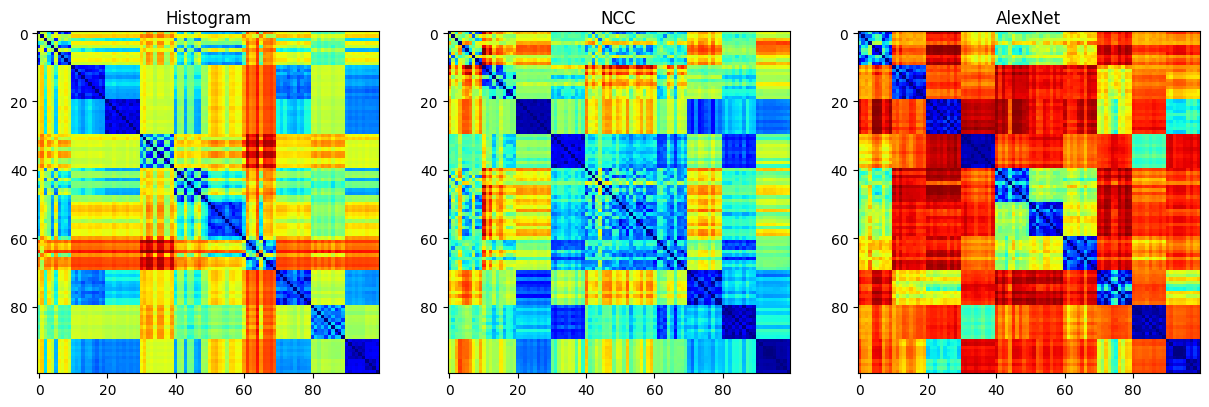

* **(5 points)** AlexNet model works well, but there are many other pretrained models available. Use a [different deep model]( https://pytorch.org/docs/stable/torchvision/models.html) to extract features for retrieval. Note that most models work for classification so you have to remote a part of the model and select the output layer that produces the most useful features for retrieval. You need to check the model documentation to find out which layer contains useful features (but generally it is the penultimate layer). Compare the performance of the selected model to the AlexNet model. You can use the same code as for the AlexNet model to start with.

In [20]:
# TODO
raise NotImplementedError()

 * **(5 points)** Extend the retrieval method based on color histograms by including spatial information, use the same concepts as in the previous tasks. Divide the input image into subregions, calculate the histogram for reach region, then concatenate the histograms into a final feature vector. Experiment with different numbers of subregions and comment on the performance of the new method.

In [ ]:
# TODO: write your code here
raise NotImplementedError()

 * **(10 points)** Implement a bag-of-words (BoW) approach for image retrieval. First, extract local features from each image (you can use SIFT or a similar descriptor found in OpenCV library), then generate a codebook via a clustering method (as described <a href="https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision#Codebook_generation">here</a>). The image feature vectors are then histograms of the codewords and can be used for comparison. Test the approach by first generate a codebook on our Caltech dataset and then use it to compare images from the COIL dataset. What is the performance of the system? How does it compare to the previous methods? See <a href="https://arxiv.org/abs/1304.5168">the paper</a> for further info on implementation details for BoW image retrieval. 

In [1]:
# TODO: write your code here
raise NotImplementedError()

## Assignment 3: ROC analysis

The purpose of this assignment is to learn the theory and practical use of ROC analysis. Therefore you should first read <a href="https://www.sciencedirect.com/science/article/pii/S016786550500303X">a paper about ROC curves</a> (if you do not have access to ScienceDirect a copy is available in the exercise material). While reading, pay special attention to sections $1$--$5$ and $7$--$8$. In the following tasks you will work on a given theoretical example of two classifiers ($C_1$ and $C_2$).

We have a set of samples that we wish to classify in one of two classes and a ground truth class of each sample (denoted as $0$ and $1$). For each sample a classifier gives us a score based on which we can determine to which class should the sample belong to (score closer to $0$ means class $0$, score closer to $1$ means class $1$). Below are the results for $8$ samples, their ground truth values ($\xi_\mathrm{id}$) and the score values for both classifiers ($\xi_{C_1}$ and $\xi_{C_2}$).

$$
    \begin{array}{c}
            {\xi_\mathrm{id} = } & {\left[ {} \right.} & 1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & {\left. {} \right]}  \\
            {\xi_{C_1} = } & {\left[ {} \right.} & {0.5} & {0.3} & {0.6} & {0.22} & {0.4} & {0.51} & {0.2} & {0.33} & {\left. {} \right]}  \\
            {\xi_{C_2} = } & {\left[ {} \right.} & {0.04} & {0.1} & {0.68} & {0.22} & {0.4} & {0.11} & {0.8} & {0.53} & {\left. {} \right]}  \\
    \end{array}
$$

 * For the example above calculate and draw the ROC curves (by hand) for classifier $C_1$ as well as classifier $C_2$. Also calculate the area under the curve (AUC) for both classifiers. For the classifier $C_1$ select a decision threshold (working points) $\vartheta_{th1}=0.33$ and use it to calculate the confusion matrix and the $F$ measure score. Do the same thing for the classifier $C_2$ using a threshold value $\vartheta_{th2}=0.1$.

    **Question:** Based on <a href="https://www.sciencedirect.com/science/article/pii/S016786550500303X">Fawcett theory</a> decide which classifier is better in the selected working points and motivate your decision. Which working point is optimal for each classifier?

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import numpy as np

id_t = np.array([1, 0, 1, 1, 1, 0, 0, 0])
c1 = np.array([0.50, 0.3, 0.60, 0.22, 0.4, 0.51, 0.2, 0.33])
c2 = np.array([0.04, 0.1, 0.68, 0.22, 0.4, 0.11, 0.8, 0.53])

fpr_c1, tpr_c1, _ = roc_curve(id_t, c1)
fpr_c2, tpr_c2, _ = roc_curve(id_t, c2)

plt.plot(fpr_c1, tpr_c1)
plt.plot(fpr_c2, tpr_c2)

c1_auc = auc(fpr_c1, tpr_c1)
c2_auc = auc(fpr_c2, tpr_c2)
print(f"c1_auc: {c1_auc}")
print(f"c2_auc: {c2_auc}")

th1 = 0.33
th2 = 0.1
predictions_c1 = (c1 > th1).astype(int)
predictions_c2 = (c2 > th2).astype(int)

confusion_matrix_c1 = confusion_matrix(id_t, predictions_c1)
confusion_matrix_c2 = confusion_matrix(id_t, predictions_c2)
f1_c1 = f1_score(id_t, predictions_c1)
f1_c2 = f1_score(id_t, predictions_c2)

print(f"c1_conf:\n {confusion_matrix_c1}")
print(f"c2_conf:\n {confusion_matrix_c2}")
print(f"c1_f1: {f1_c1}")
print(f"c2_f1: {f1_c2}")


 * You will now calculate ROC points for the <i>combined classifiers</i>. We have two binary classifiers, $C_1$ ($\vartheta_{th1}=0.33$) and $C_2$ ($\vartheta_{th2}=0.1$), which means that the classifier $C_1$ classifies a sample as class $1$, if its score is $\xi_{C_1}(\mathbf{x}_i) > \vartheta_{th1}$, otherwise it classifies it as class $0$, similarly can be said about classifier $C_2$. The first combined classifier $C_3$ can be obtained as the intersection of decisions of the two basic classifiers, $C_3 = C_1 \bigwedge C_2$ ($C_3$ classifies a sample as class $1$ if both basic classifiers classify it as class $1$). The second one can be obtained as an union of the decisions of the two basic classifiers, $C_4 = C_1 \bigvee C_2$ ($C_4$ classifies a sample as class $1$ if at least one of the basic classifiers classifies it as class $1$). For each combined classifier calculate its *point* in the ROC space together with the ROC curves from previous tasks.

In [ ]:
th1 = 0.33
th2 = 0.1

c1_e = c1 > th1
c2_e = c2 > th2

c3 = np.logical_and(c1_e, c2_e).astype(int)
c4 = np.logical_or(c1_e, c2_e).astype(int)

fpr_c3, tpr_c3, _ = roc_curve(id_t, c3)
fpr_c4, tpr_c4, _ = roc_curve(id_t, c4)

plt.plot(fpr_c1, tpr_c1)
plt.plot(fpr_c2, tpr_c2)
plt.scatter(fpr_c3[1], tpr_c3[1])
plt.scatter(fpr_c4[1], tpr_c4[1])
plt.show()


* Use [sklearn.metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to calculate ROC cruves. Study the documentation and reproduce results for the classifiers from the previous task. To obtain AUC you can use [sklearn.metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr_c1, tpr_c1, _ = roc_curve(id_t, c1)
fpr_c2, tpr_c2, _ = roc_curve(id_t, c2)

c1_auc = roc_auc_score(id_t, c1)
c2_auc = roc_auc_score(id_t, c2)

print(f"fpr1: {fpr_c1}, tpr1: {tpr_c1}, auc: {c1_auc}")
print(f"fpr2: {fpr_c2}, tpr2: {tpr_c2}, auc: {c2_auc}")

plt.plot(fpr_c1, tpr_c1)
plt.plot(fpr_c2, tpr_c2)
plt.show()

 * [Fawcett et al.](https://www.sciencedirect.com/science/article/pii/S016786550500303X) explains how to select an optimal working point for a classifier from a ROC curve. The threshold should be at the point on the curve that is the closest to the point $[0,1]$ in the ROC space. Write a function **get_wp** that calculates the optimal working point for the given ROC curve and returns the corresponding threshold value and $F$ score value as results. Test your code on classifiers $C_1$ and $C_2$. Based on the AUC decide which classifier is performing better over all threshold values, based on the $F$ score at the optimal working point decide which classifier is better at this point. Write a script that calculates and draws ROC curves for classifiers $C_1$ and $C_2$ on the same plot, for both classifiers mark the optimal working point and set the title of the plot to display values of the thresholds, $F$ scores and AUC for both classifiers.

In [ ]:
# TODO
raise NotImplementedError()

 * The image retrieval systems can currently return distances between each image in the database to the reference image. If we want to build a binary classifier we have to determine the optimal threshold that can be used to decide if a classifier belongs to the class of the reference image or not. Use the ROC curves to determine optimal threshold. You can use an image in the selected database as a reference image and compute distances to every other image in the dataset. If we select the first image we can generate a ROC curve for that image, however, this curve only tells us the properties of the system for this input and may not be generalizable. If we select a different image we can get a completely different ROC curve with a different optimal point. Instead, use the following procedure to compute the ROC curve over all images in the database.

      1. Load the database.
      2. For faster computation, precompute the feature vectors for all images in the database.
      2. For each image (its features) in the database:
          * Use the selected image as a reference image.</li>
          * Compute the distance between the reference image and the remaining images in the database and store the distances to vector $\vartheta_\mathrm{score}$<br>(the vector must not include distance to the reference image itself).
          * Use the provided label ground truth data to compose a vector of binary ground truth for the given reference image by comparing it to the class of the reference image. Save the binary ground truth to vector $\vartheta_\mathrm{class}$.
          * Extend the overall vectors for scores and ground truth by appending the new data: $\varphi_\mathrm{class} = \varphi_\mathrm{class} + \vartheta_\mathrm{class}$ and $\varphi_\mathrm{score} = \varphi_\mathrm{score} + \vartheta_\mathrm{score}$.  
      3. Use the composed overall vectors $\varphi_\mathrm{score}$ and $\varphi_\mathrm{class}$ to compute the ROC curve.
   
   Evaluate all three systems from the previous assignment by plotting their ROC curves and compare them. Note that you will have to negate the distances obtained with your implementations to use them with `roc_curve` and `roc_auc_score`. Determine the optimal threshold value, plot it in the ROC space (on top of the ROC curve). Do not forget to label the axes of the plot. Perform the analysis on both provided datasets. 

   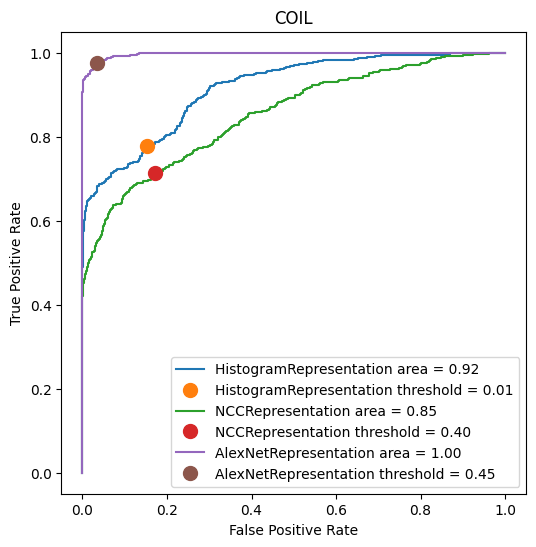

In [33]:
# TODO: write your code here

raise NotImplementedError()

* What are the differences between the two datasets? What are the differences between the three systems?